In [135]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots I will create

In [136]:
# Read in the data

df= pd.read_csv(r'C:\Users\DennisNjiru\OneDrive\DATA ANALYSIS PROJECTS\Python Projects\movies.csv')

In [137]:
# Look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [138]:
# Look for missing data

df.isnull().sum() 

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [139]:
# There are missing values in the data. I chose to drop the rows with the missing values as I will still have 75% of the data remain

df = df.dropna()

In [140]:
# Columns Data Types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [141]:
# Change the data type of columns with wrong data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [142]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [143]:
# I noticed that the year in year column and released column do not match.
# Creating a column that is clean based on released column

df['released'] = df['released'].astype(str)
df['correctyear'] = df['released'].str.extract(pat = '([0-9]{4})')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime correctyear  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0        1980  
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0        1980  
4   39846344      Orion Pictures     98.0        1980

In [144]:
# Lets see the movies with the highest gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime correctyear  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

In [145]:
# Update so it shows full data

pd.set_option('display.max_rows', None)

<Axes: >

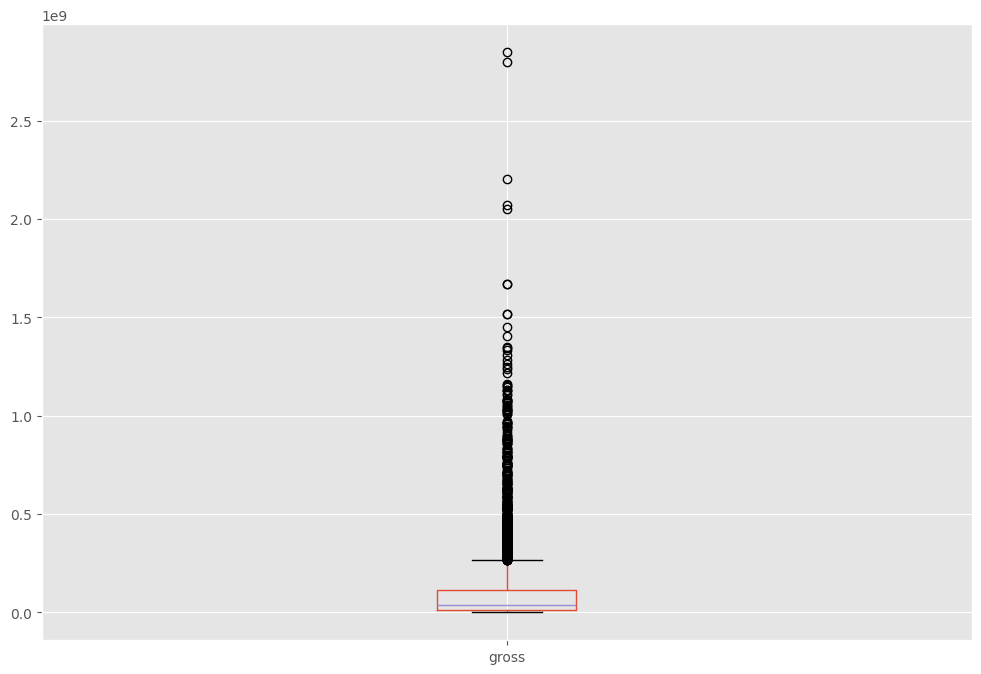

In [146]:
# Look for any Outliers

df.boxplot(column=['gross'])

In [147]:
# Drop any duplicate

df['company'].drop_duplicates()

5445                                Twentieth Century Fox
7445                                       Marvel Studios
6663                                            Lucasfilm
7480                                 Walt Disney Pictures
6653                                   Universal Pictures
7494                        Walt Disney Animation Studios
5845                                         Warner Bros.
7072                                     Mandeville Films
6688                           Illumination Entertainment
4245                                      New Line Cinema
7458                                    Columbia Pictures
5878                                   Paramount Pictures
6059                            Metro-Goldwyn-Mayer (MGM)
7488                              Pixar Animation Studios
6905                               Fairview Entertainment
4476                                  Dreamworks Pictures
5539                      Twentieth Century Fox Animation
6665          

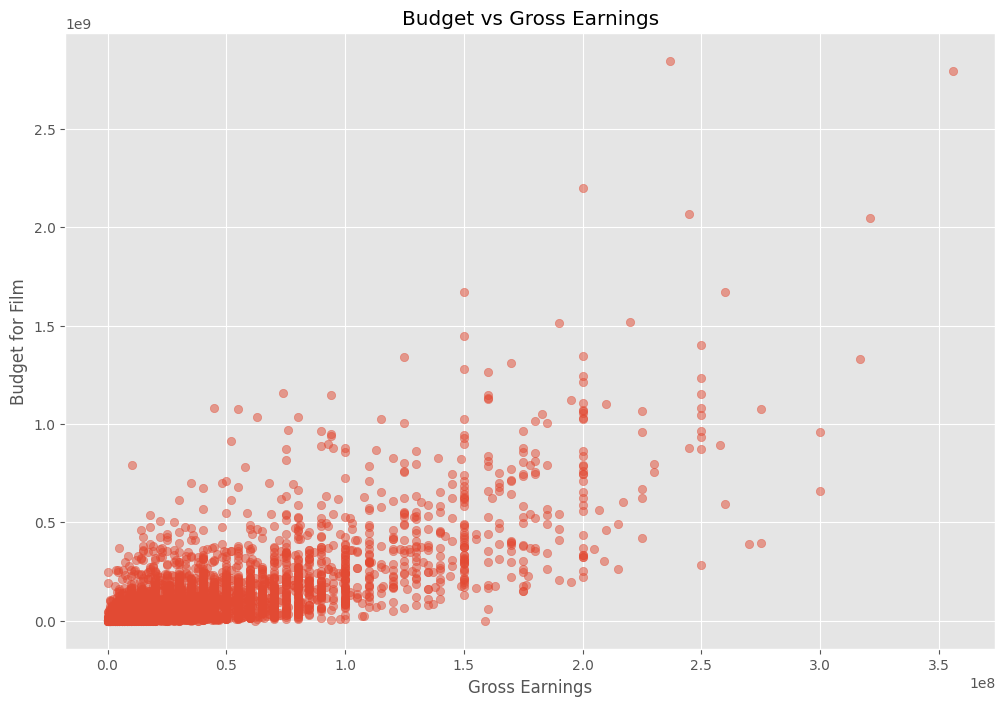

In [127]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

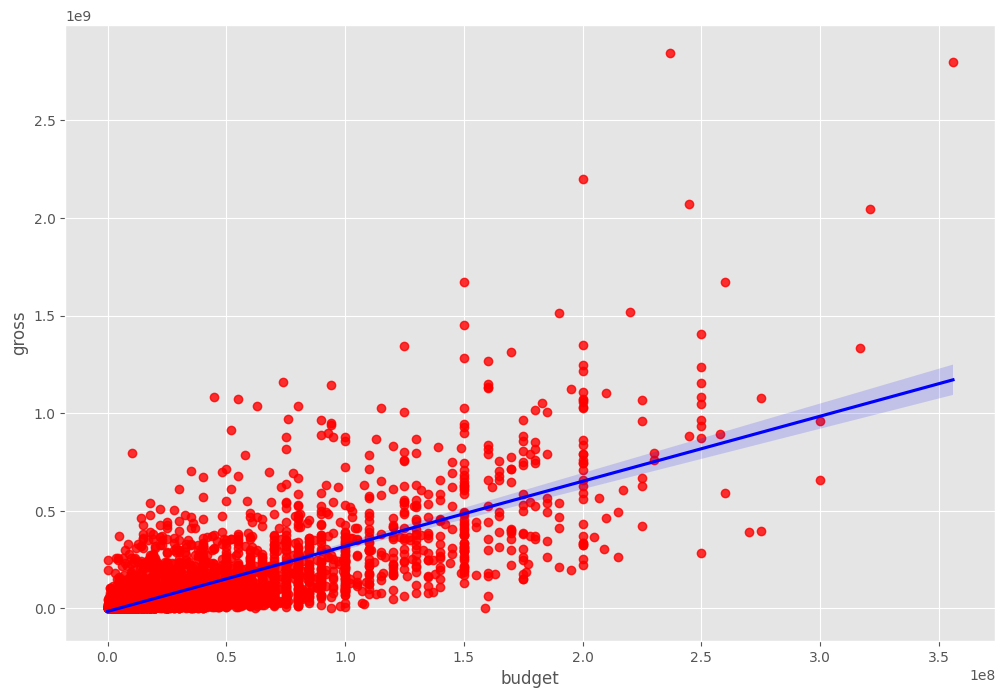

In [86]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [87]:
# Let's look at correlation

In [103]:
df.corr(method="pearson", numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [104]:
# There is a high correlation between budget and gross

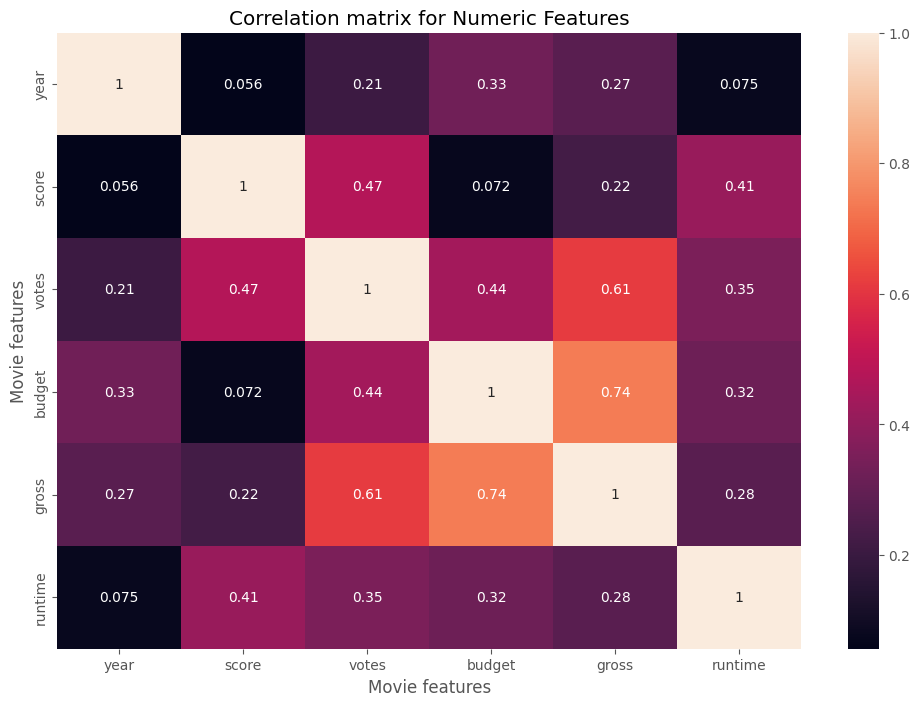

In [109]:
correlation_matrix = df.corr(method="pearson", numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [110]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name         1.000000  0.314800  0.186668  0.267282  0.667785  0.136453   
rating       0.314800  1.000000  0.031419  0.096638  0.241252 -0.075109   
genre        0.186668  0.031419  1.000000  0.075279  0.115080  0.047421   
year         0.267282  0.096638  0.075279  1.000000  0.359790  0.045163   
released     0.667785  0.241252  0.115080  0.359790  1.000000  0.099607   
score        0.136453 -0.075109  0.047421  0.045163  0.099607  1.000000   
votes        0.608412  0.121122  0.177836  0.286895  0.481682  0.247863   
director     0.679807  0.230190  0.131437  0.186505  0.478949  0.176117   
writer       0.764057  0.251470  0.129595  0.231664  0.541156  0.122357   
star         0.599409  0.226006  0.143735  0.240670  0.439566  0.139127   
country      0.124405  0.111309 -0.055109 -0.047325  0.095520 -0.057087   
budget       0.526690  0.283770  0.175071  0.190333  0.396934 -0.005767   
gross        0.986431  0.319778  0.185075  0.277721  0.677897  0.139819   
company      0.631721  0.269792  0.080643  0.136096  0.410408  0.022732   
runtime      0.089567  0.029208  0.011329  0.037011  0.058182  0.057866   
correctyear  0.262849  0.087261  0.071750  0.949995  0.358542  0.053108   

                votes  director    writer      star   country    budget  \
name         0.608412  0.679807  0.764057  0.599409  0.124405  0.526690   
rating       0.121122  0.230190  0.251470  0.226006  0.111309  0.283770   
genre        0.177836  0.131437  0.129595  0.143735 -0.055109  0.175071   
year         0.286895  0.186505  0.231664  0.240670 -0.047325  0.190333   
released     0.481682  0.478949  0.541156  0.439566  0.095520  0.396934   
score        0.247863  0.176117  0.122357  0.139127 -0.057087 -0.005767   
votes        1.000000  0.472671  0.522918  0.429085  0.013363  0.317842   
director     0.472671  1.000000  0.642875  0.504992  0.123672  0.443151   
writer       0.522918  0.642875  1.000000  0.510628  0.138299  0.449523   
star         0.429085  0.504992  0.510628  1.000000  0.106459  0.457442   
country      0.013363  0.123672  0.138299  0.106459  1.000000  0.112280   
budget       0.317842  0.443151  0.449523  0.457442  0.112280  1.000000   
gross        0.620450  0.692902  0.776528  0.612142  0.123874  0.532810   
company      0.346864  0.528071  0.532014  0.455444  0.177990  0.476917   
runtime      0.088525  0.084943  0.066645  0.096652  0.020546  0.092727   
correctyear  0.287857  0.190556  0.230543  0.242124 -0.045134  0.183598   

                gross   company   runtime  correctyear  
name         0.986431  0.631721  0.089567     0.262849  
rating       0.319778  0.269792  0.029208     0.087261  
genre        0.185075  0.080643  0.011329     0.071750  
year         0.277721  0.136096  0.037011     0.949995  
released     0.677897  0.410408  0.058182     0.358542  
score        0.139819  0.022732  0.057866     0.053108  
votes        0.620450  0.346864  0.088525     0.287857  
director     0.692902  0.528071  0.084943     0.190556  
writer       0.776528  0.532014  0.066645     0.230543  
star         0.612142  0.455444  0.096652     0.242124  
country      0.123874  0.177990  0.020546    -0.045134  
budget       0.532810  0.476917  0.092727     0.183598  
gross        1.000000  0.637241  0.088572     0.272536  
company      0.637241  1.000000  0.069329     0.134709  
runtime      0.088572  0.069329  1.000000     0.036785  
correctyear  0.272536  0.134709  0.036785     1.000000

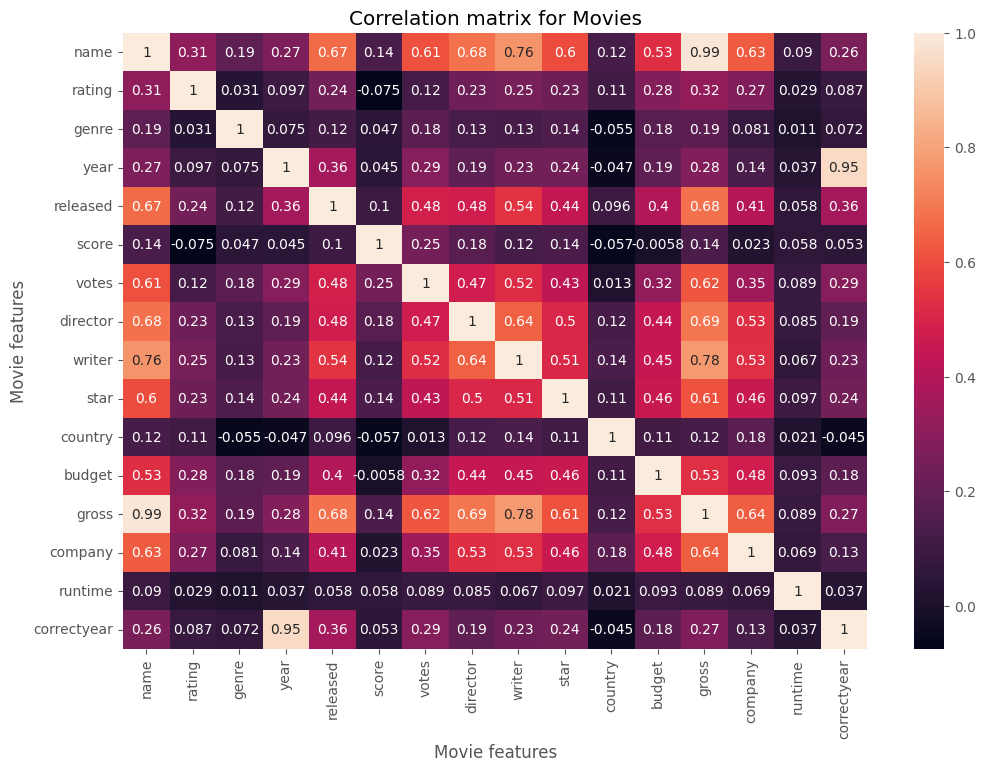

In [111]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [112]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.314800
             genre          0.186668
             year           0.267282
             released       0.667785
             score          0.136453
             votes          0.608412
             director       0.679807
             writer         0.764057
             star           0.599409
             country        0.124405
             budget         0.526690
             gross          0.986431
             company        0.631721
             runtime        0.089567
             correctyear    0.262849
rating       name           0.314800
             rating         1.000000
             genre          0.031419
             year           0.096638
             released       0.241252
             score         -0.075109
             votes          0.121122
             director       0.230190
             writer         0.251470
             star           0.226006
             country        0.111309
 

In [113]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating       score         -0.075109
score        rating        -0.075109
             country       -0.057087
country      score         -0.057087
             genre         -0.055109
genre        country       -0.055109
year         country       -0.047325
country      year          -0.047325
             correctyear   -0.045134
correctyear  country       -0.045134
budget       score         -0.005767
score        budget        -0.005767
genre        runtime        0.011329
runtime      genre          0.011329
country      votes          0.013363
votes        country        0.013363
runtime      country        0.020546
country      runtime        0.020546
score        company        0.022732
company      score          0.022732
runtime      rating         0.029208
rating       runtime        0.029208
             genre          0.031419
genre        rating         0.031419
runtime      correctyear    0.036785
correctyear  runtime        0.036785
year         runtime        0.037011
r

In [114]:
# Taking a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         director       0.504992
director     star           0.504992
star         writer         0.510628
writer       star           0.510628
votes        writer         0.522918
writer       votes          0.522918
budget       name           0.526690
name         budget         0.526690
director     company        0.528071
company      director       0.528071
             writer         0.532014
writer       company        0.532014
budget       gross          0.532810
gross        budget         0.532810
writer       released       0.541156
released     writer         0.541156
name         star           0.599409
star         name           0.599409
votes        name           0.608412
name         votes          0.608412
gross        star           0.612142
star         gross          0.612142
gross        votes          0.620450
votes        gross          0.620450
name         company        0.631721
company      name           0.631721
gross        company        0.637241
c

In [115]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [116]:
df['Year'] = df['released'].astype(str).str[:4]
df

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [121]:
# Look at the total Gross for the companies each year

df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                                            year            
"DIA" Productions GmbH & Co. KG                    2003    44350926
"Weathering With You" Film Partners                2019   193457467
.406 Production                                    1996       10580
1492 Pictures                                      1996   129832389
                                                   1999    87423861
1818 Productions                                   1983    12232628
19 Entertainment                                   2003     4928883
1978 Films                                         2017    40656399
1984 Private Defense Contractors                   2014    58834384
2 Loop Films                                       2002      264349
2.0 Entertainment                                  2019   122810399
2.4.7. Films                                       2007    22783978
2003 Productions                                   2004    69424389
20th Century Studios                               2020   111105497
21 Laps Entertainment                              2014    41296320
                                                   2018    41142379
21st Century Film Corporation                      1990     5835247
21st Century Films                                 1994     1702394
25th Hour Productions                              2002    23932055
26 Films                                           2009    20458873
2929 Productions                                   2007     7248490
                                                   2008    28705178
                                                   2014     5092129
2DUX²                                              2016      678150
                                                   2018   197744377
3 Arts Entertainment                               1996    60209334
                                                   1997    75812433
                                                   2001    71186502
                                                   2010      649626
                                                   2013     3909596
                                                   2014   161459297
                                                   2015    36606743
                                                   2019    22386555
3 Miles Apart Productions Ltd.                     1999     8408835
3311 Productions                                   2017     5042014
360 Pictures                                       2007     9669758
3Mark Entertainment                                2001     4760014
4 Kids Entertainment                               1999   133949270
40 Acres & A Mule Filmworks                        1986     7137502
                                                   1989    37295445
                                                   1995    15403436
                                                   1999    34573780
                                                   2000    27728118
                                                   2004     1526951
4Kids Entertainment                                2007    95802916
7 Arts International                               1999      206128
7 Films Cinéma                                     2000     3033646
88 Productions                                     1990    10005969
888 Productions                                    1990   201965915
900 Films                                          2003     5141166
98 MPH Productions                                 2002    80693537
A Band Apart                                       1995     3734870
                                                   1996       49620
                                                   2002    14946150
A&M Films                                          1984     1455045
                                                   1988      161004
                                                   1992     1526697
                                                  

In [125]:
# Sort by highest gross, company and year

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [126]:
# Sort by highest gross


CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64